## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

## Load datasets

In [2]:
training_data = 'data/train.csv'
test_data = 'data/test.csv'

df = pd.read_csv(training_data)
df_test = pd.read_csv(test_data)

## Data fields<br>
__id__ - a unique identifier for each trip<br>
__vendor_id__ - a code indicating the provider associated with the trip record<br>
__pickup_datetime__ - date and time when the meter was engaged<br>
__dropoff_datetime__ - date and time when the meter was disengaged<br>
__passenger_count__ - the number of passengers in the vehicle (driver entered value)<br>
__pickup_longitude__ - the longitude where the meter was engaged<br>
__pickup_latitude__ - the latitude where the meter was engaged<br>
__dropoff_longitude__ - the longitude where the meter was disengaged<br>
__dropoff_latitude__ - the latitude where the meter was disengaged<br>
__store_and_fwd_flag__ - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server <br> 
Y=store and forward; N=not a store and forward trip <br>
__trip_duration__ - duration of the trip in seconds<br>

## Exploring the data

In [3]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [5]:
## date time data needs to be converted from object to datetime format

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


In [6]:
df.describe()

## The only numerical columns with describable statistics are "pickup_datetime", "dropoff_datetime", "passenger_count" & "trip_duration"

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1458644,1458644,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,2016-04-01 10:10:24.940037120,2016-04-01 10:26:24.432310528,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
min,1.000000e+00,2016-01-01 00:00:17,2016-01-01 00:03:31,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,2016-02-17 16:46:04.249999872,2016-02-17 17:05:32.500000,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,2016-04-01 17:19:40,2016-04-01 17:35:12,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2016-05-15 03:56:08.750000128,2016-05-15 04:10:51.750000128,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,2016-06-30 23:59:39,2016-07-01 23:02:03,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06
std,4.987772e-01,NaN,NaN,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03


In [7]:
## Check for duplicate data

dup_rows = df.duplicated().sum()
print(f' number of duplicated rows: {dup_rows}')

dup_ids = df.duplicated(subset=['id']).sum()
print(f' number of duplicated ids: {dup_ids}')


 number of duplicated rows: 0
 number of duplicated ids: 0


In [8]:
## check for NaNs

df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [9]:
## Are the store_and_fwd_flag catagories correct? For instance are there other catagories than Y or N, or have some been capitalised and others not.

flag_unique = df['store_and_fwd_flag'].unique()
flag_nunique = df['store_and_fwd_flag'].nunique()
print(f' unique catagories in store_and_fwd_flag: {flag_unique}')
print(f' number of unique catagories in store_and_fwd_flag: {flag_nunique}')

 unique catagories in store_and_fwd_flag: ['N' 'Y']
 number of unique catagories in store_and_fwd_flag: 2


## Visualise Data Distribution <br>
check for outliers in the data that could be incorrect. this dat could significantly influence later models.

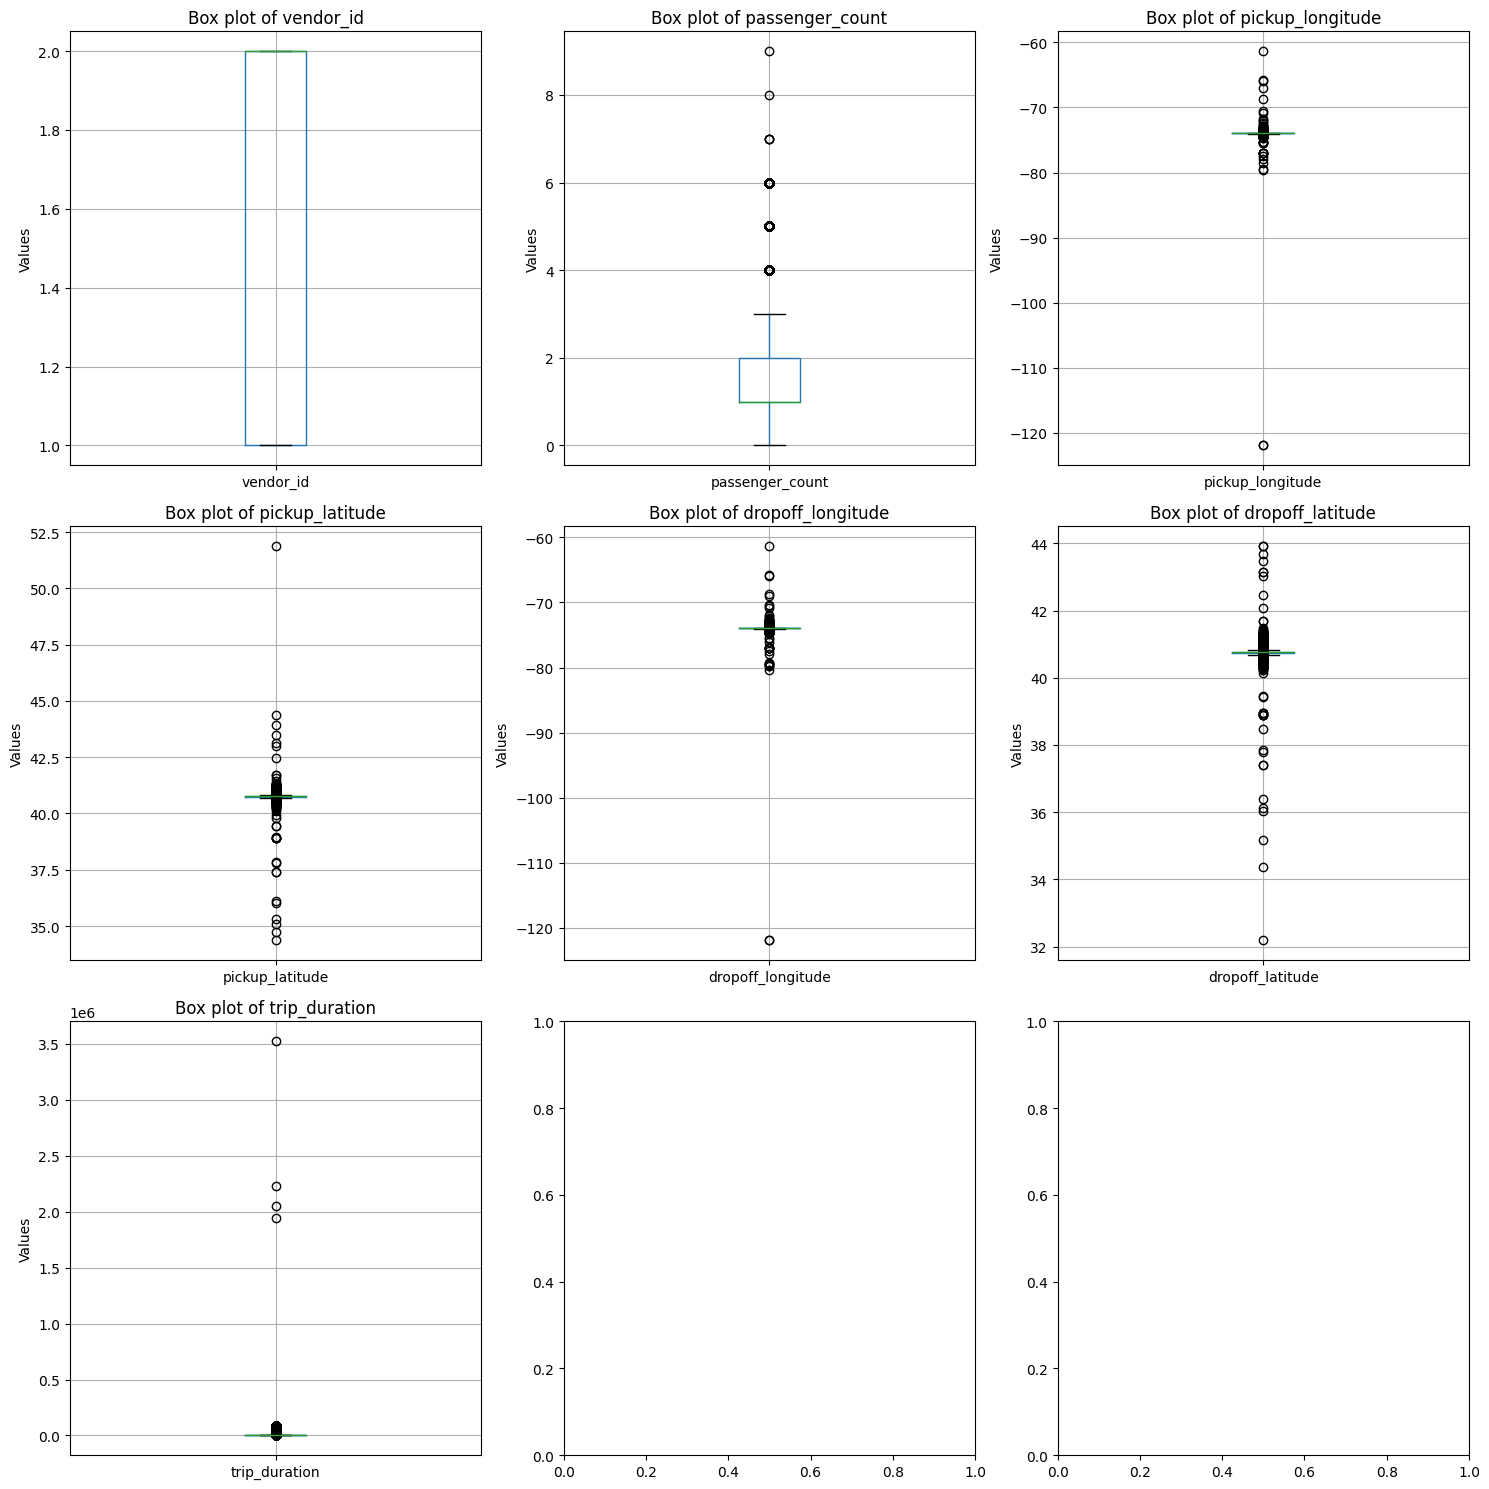

In [10]:
numeric_columns = df.select_dtypes(include=['number']).columns

# Create a 3x3 grid of subplots for numeric columns (box plots)
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i, column in enumerate(numeric_columns):
    # Calculate the position in the grid where this subplot should go
    row = i // 3
    col = i % 3

    # Create the boxplot in the correct position
    df.boxplot(column, ax=axs[row, col])
    axs[row, col].set_title(f'Box plot of {column}')  # Sets the title of the plot
    axs[row, col].set_ylabel('Values')  # Sets the label of the y-axis

plt.tight_layout()  # Adjusts the layout so that there is no overlap between subplots
plt.show()  # Displays the plots




There appear to be several outliers for trip duration that seem like an impossible journey time. These rows should be deleted. <br>
There is also an outlier in the longitude columns. This will require a little more investigate. 

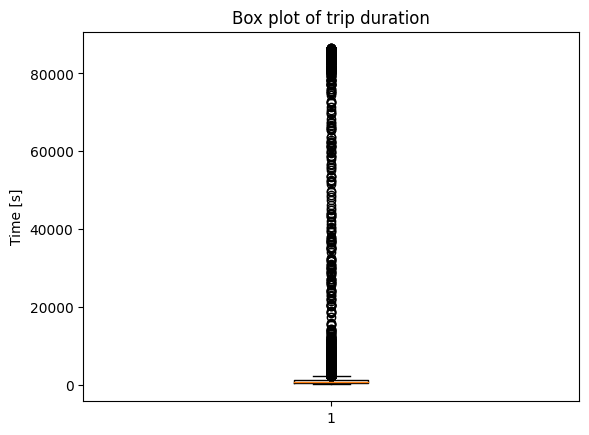

In [28]:
## remove all rows with trip_duration less that or equal to zero & greater than or equal to 86,400 seconds(24hrs)
df_filt = df[(df['trip_duration'] > 30) & (df['trip_duration'] <= 200000)]
df_filt

plt.boxplot(df_filt['trip_duration'])
plt.title(f'Box plot of trip duration')
plt.ylabel('Time [s]')
plt.show()

There is still a large number of incorrect trip durations. There are several ways to deal with these type of outliers.

The simplest way would be to remove all data points that lie outside 3 standard deviations from the mean. This may delete results thaat are true though.

A more complicated way could be to calculate the straight line distance between pickup & dropoff locations. Then calculate the ratio of straightline distance vs time. Any trips that fall outside a reasonable ratio of distance vs time could be dropped. It is possible that some trips are several hours long because the journey distance is high. It would not be a good idea to remove these outliers if the data is real.

I will show how to do filter using both methods

/tmp/ipykernel_2012/3846518540.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt['duration_zscore'] = zscore(df_filt['trip_duration'])


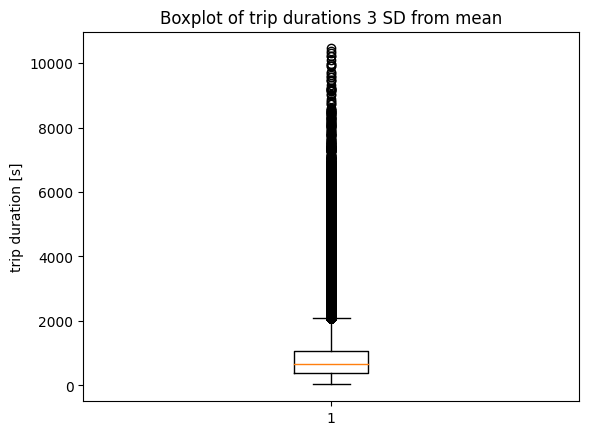

In [29]:
## METHOD ONE
## Use the filtered data to work out the correct mean and zscores, as the trip durations below zero and above 100,000 are clearly not correct and should not influence the calculations.

df_filt['duration_zscore'] = zscore(df_filt['trip_duration'])
df_filt_z = df_filt[(df_filt['duration_zscore'] >= -3) & (df_filt['duration_zscore'] <= 3)]

plt.boxplot(df_filt_z['trip_duration'])
plt.title(f'Boxplot of trip durations 3 SD from mean')
plt.ylabel('trip duration [s]')
plt.show()

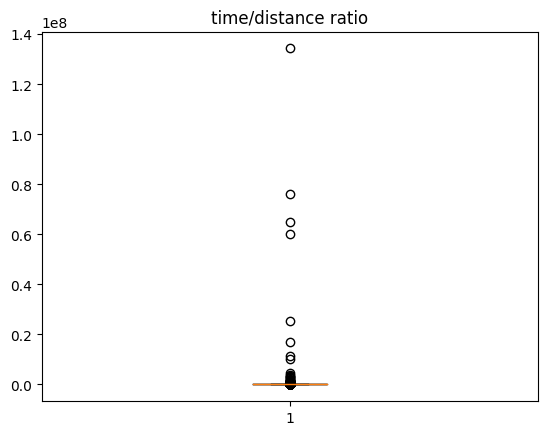

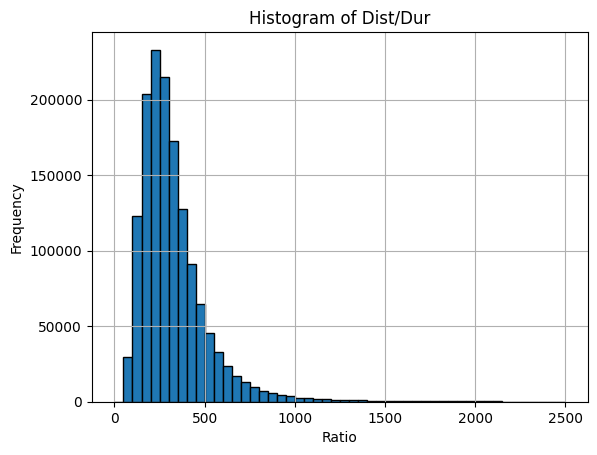

In [39]:
## METHOD TWO

## It was discovered while trying to plot a hostogram of these ratios that infinite values were present. This was either because the time was either zero, 
## or the distance was zero because pickup and drop off locations were the same. Therefore rows where pickup and dropoff locations are equal need to be removed.

df_filt = df_filt[~((df_filt['pickup_latitude'] == df_filt['dropoff_latitude']) & (df_filt['pickup_longitude'] == df_filt['dropoff_longitude']))]

## Step 1 - Work out the Euclidean distance between two points on a sphere

def haversine(longA, latA, longB, latB):
    # Earths radius [km]
    R = 6371.0

    # Convert degree co-ordinates into radians.
    longA, latA, longB, latB = map(np.radians, [longA, latA, longB, latB])

    # Calculate difference between points.
    dlong = longB - longA
    dlat = latB- latA

    # Haversine formula
    a = np.sin(dlat/2)**2 + np.cos(latA) * np.cos(latB) * np.sin(dlong/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1- a))

    # Calculate distance
    distance = R * c
    
    return distance


# Create column of Euclidean distance [km] between pickup and dropoff points

df_filt['euclidean_dist'] = haversine(df_filt['pickup_longitude'], df_filt['pickup_latitude'], df_filt['dropoff_longitude'], df_filt['dropoff_latitude'])

# Create column of ratio between trip duration and trip Euclidean distance.

df_filt['dur_dist_ratio'] = df_filt['trip_duration'] / df_filt['euclidean_dist']

# Plot Boxplot of Ratio

plt.boxplot(df_filt['dur_dist_ratio'])
plt.title(f'time/distance ratio')
plt.show()

# Plot histogram

df_filt['dur_dist_ratio'].hist(bins=50, range=(0, 2500), edgecolor='black')
plt.title('Histogram of Dist/Dur')
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.show()

# from the histogram plots, it would be a reasonable assumpption to remove the outliers where the dist/dur ratio is great than 1500


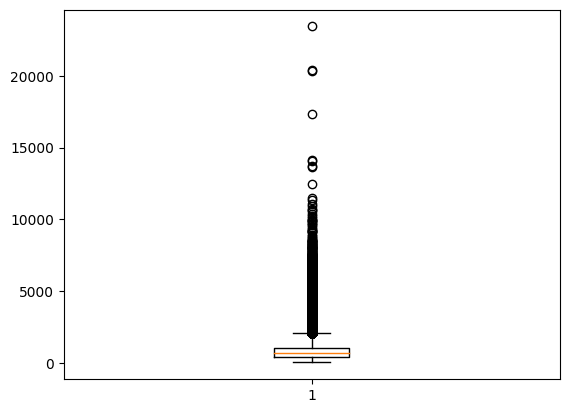

In [45]:
# from the histogram plots, it would be a reasonable assumpption to remove the outliers where the dist/dur ratio is great than 1000

df_filt = df_filt[(df_filt['dur_dist_ratio'] < 1000)]
plt.boxplot(df_filt['trip_duration'])
plt.show()

In [ ]:
#

In [13]:
# Add day of week, seperate time from date compute straight line distance between coordinates